In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

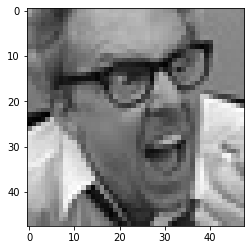

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "Training/"

In [6]:
Classes = ["0","1","2","3","4","5","6"] ##name of folders

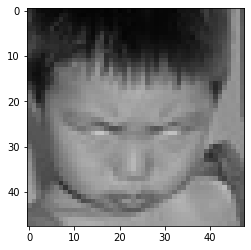

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

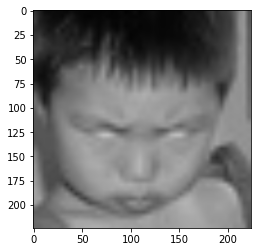

In [8]:
img_size = 224 ##Imagenet dataset images size is 224*224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

# Reading all the Images and convert them to array

In [10]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

3052


In [13]:
import random 
random.shuffle(training_Data)

In [14]:
X = [] ## data/feature
y = [] ##label
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3) ##converting to 4dimensions

In [15]:
X.shape

(3052, 224, 224, 3)

In [16]:
print(img_array)

[[[ 50  50  50]
  [ 32  32  32]
  [ 15  15  15]
  ...
  [133 133 133]
  [151 151 151]
  [ 86  86  86]]

 [[ 57  57  57]
  [ 34  34  34]
  [ 22  22  22]
  ...
  [138 138 138]
  [151 151 151]
  [ 89  89  89]]

 [[ 61  61  61]
  [ 30  30  30]
  [ 24  24  24]
  ...
  [142 142 142]
  [149 149 149]
  [ 89  89  89]]

 ...

 [[103 103 103]
  [100 100 100]
  [100 100 100]
  ...
  [149 149 149]
  [104 104 104]
  [ 85  85  85]]

 [[107 107 107]
  [111 111 111]
  [113 113 113]
  ...
  [151 151 151]
  [120 120 120]
  [ 86  86  86]]

 [[104 104 104]
  [104 104 104]
  [112 112 112]
  ...
  [143 143 143]
  [136 136 136]
  [ 83  83  83]]]


In [17]:
X=X/255.0

In [18]:
X[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       ...,

       [[0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0

In [19]:
y[1000]

3

In [20]:
Y = np.array(y)

In [21]:
Y.shape

(3052,)

# Our model for Training

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNetV2() ##Pre-trained model

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Transfer Learning - Tuning , weights will start from last checkpoint

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output = layers.Dense(128)(base_output) ##adding new layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [29]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [30]:
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [31]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [32]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
new_model.fit(X,Y,epochs=21)

Epoch 1/21
96/96 [==============================] - 496s 5s/step - loss: 1.6188 - accuracy: 0.3781
Epoch 2/21
96/96 [==============================] - 729s 8s/step - loss: 1.3359 - accuracy: 0.4951
Epoch 3/21
96/96 [==============================] - 447s 5s/step - loss: 1.1444 - accuracy: 0.5786
Epoch 4/21
96/96 [==============================] - 446s 5s/step - loss: 1.0188 - accuracy: 0.6343
Epoch 5/21
96/96 [==============================] - 954s 10s/step - loss: 0.8830 - accuracy: 0.6782
Epoch 6/21
96/96 [==============================] - 425s 4s/step - loss: 0.8077 - accuracy: 0.7018
Epoch 7/21
96/96 [==============================] - 612s 6s/step - loss: 0.6692 - accuracy: 0.7572
Epoch 8/21
96/96 [==============================] - 368s 4s/step - loss: 0.6862 - accuracy: 0.7490
Epoch 9/21
96/96 [==============================] - 397s 4s/step - loss: 0.5856 - accuracy: 0.7955
Epoch 10/21
96/96 [==============================] - 441s 5s/step - loss: 0.4767 - accuracy: 0.8273
Epoch 11

In [34]:
new_model.save('my_model_95p35.h5')

c:\python37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# Testing with an image from google that whether our model predicts correct expression or not

In [116]:
frame = cv2.imread("surprised_man.jpg")

In [117]:
frame.shape

(1155, 1600, 3)

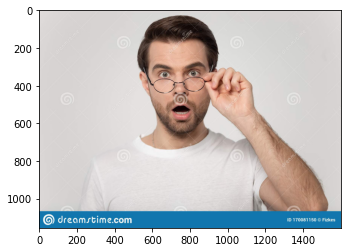

In [118]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Now we need face detection algorithm for detecting face from the image to predict expression

In [119]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [120]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [121]:
gray.shape

(1155, 1600)

Below code for Detecting all the faces in the image

In [122]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh ,ex:ex+ew]

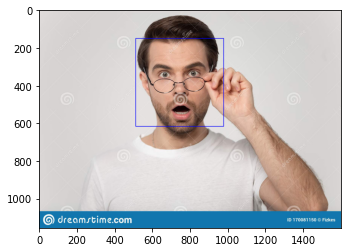

In [123]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Above we can see that face is detected and surrounded with blue line

Now we will crop only the face from the image

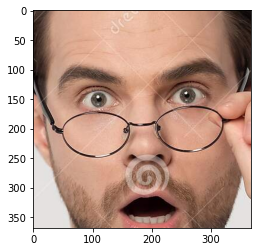

In [124]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [125]:
final_image = cv2.resize(face_roi,(224,224)) ##resizing our image to appropriate size 
final_image = np.expand_dims(final_image ,axis=0) ##adding fourth dimension
final_image = final_image/255.0 ##normalizing

In [126]:
final_image

array([[[[0.27843137, 0.30588235, 0.37254902],
         [0.21568627, 0.24313725, 0.30980392],
         [0.26666667, 0.29803922, 0.36470588],
         ...,
         [0.05490196, 0.05490196, 0.0745098 ],
         [0.05490196, 0.05490196, 0.0745098 ],
         [0.04705882, 0.04705882, 0.07058824]],

        [[0.26666667, 0.29411765, 0.36078431],
         [0.21176471, 0.23921569, 0.30588235],
         [0.28235294, 0.31372549, 0.38039216],
         ...,
         [0.06666667, 0.06666667, 0.09019608],
         [0.06666667, 0.06666667, 0.09019608],
         [0.0627451 , 0.0627451 , 0.08627451]],

        [[0.25490196, 0.28235294, 0.34901961],
         [0.2627451 , 0.29019608, 0.35686275],
         [0.27058824, 0.30196078, 0.36862745],
         ...,
         [0.05490196, 0.05490196, 0.07843137],
         [0.05882353, 0.05882353, 0.08235294],
         [0.0627451 , 0.0627451 , 0.08627451]],

        ...,

        [[0.87843137, 0.88235294, 0.89803922],
         [0.87843137, 0.88235294, 0.89803922]

In [127]:
Predictions = new_model.predict(final_image)

In [128]:
Predictions[0]

array([1.6096264e-09, 6.0597269e-09, 6.5312663e-05, 2.3694378e-08,
       1.5606915e-07, 3.1254515e-08, 9.9993443e-01], dtype=float32)

In [129]:
np.argmax(Predictions)

6

Output is 6 and our folder named 6 also contain images of surprised man.So we can say that our model is predicting correctly